In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

sample geneates random ros from the data, if you put a particular number you want it will give you the number of rows but if no number is added it will just give you a row (one row)

In [2]:
data = pd.read_csv('IRIS.csv')
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
28,5.2,3.4,1.4,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor


In [3]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

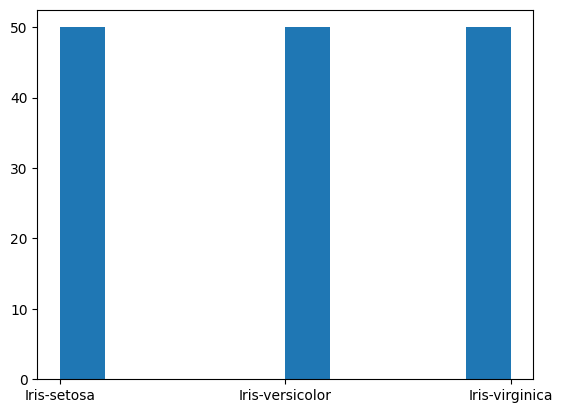

In [4]:
plt.hist(data['species'])

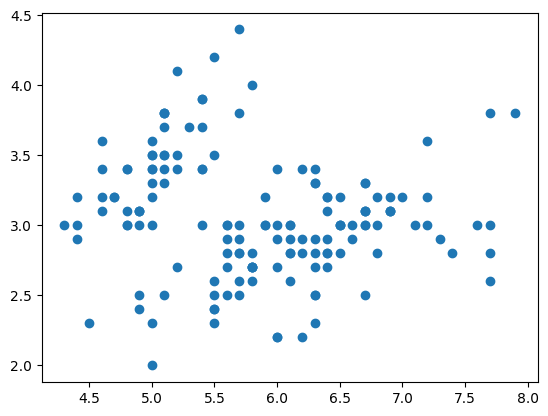

In [5]:
plt.scatter(data['sepal_length'], data['sepal_width'])

Change the words to numbers cause computer doen't understand words but numbers

In [6]:
data['num_species'] = data['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,num_species
6,4.6,3.4,1.4,0.3,Iris-setosa,0
79,5.7,2.6,3.5,1.0,Iris-versicolor,1
44,5.1,3.8,1.9,0.4,Iris-setosa,0
25,5.0,3.0,1.6,0.2,Iris-setosa,0
33,5.5,4.2,1.4,0.2,Iris-setosa,0


Seperate your features and labels

In [7]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y = data['num_species']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: num_species, dtype: int64

Split datasets into training and testing dataset.




Stratify parameter helps the data to be balanced both in training and testing

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [10]:
x_train.shape, y_train.shape

((120, 4), (120,))

Start training

In [11]:
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
predictions = model1.predict(x_test)
predictions

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0], dtype=int64)

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
predictions2 = model2.predict(x_test)
predictions2

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0], dtype=int64)

In [16]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
joblib.dump(model2, 'knn_leaf.pkl')

['knn_leaf.pkl']

In [21]:
test_data = [1.2, 0.1, 1.3, 1.4]
pred = model2.predict([test_data])
if pred[0] == 0:
    print("Iris-setosa")

Iris-setosa


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
